## Импорт библиотек

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

## Функция для вычисления коэффициента корреляции

In [35]:
def calculate_correlation(x, y):
    """
    Функция для вычисления коэффициента корреляции Пирсона между двумя массивами x и y.

    Аргументы:
    x (array): Массив значений первой переменной.
    y (array): Массив значений второй переменной.

    Возвращает:
    float: Коэффициент корреляции Пирсона.
    """
    n = len(x)
    av_x, av_y = np.average(x), np.average(y)
    numerator = sum((x[j] - av_x) * (y[j] - av_y) for j in range(n))
    denominator = math.sqrt(sum((_x - av_x)**2 for _x in x) * sum((_y - av_y)**2 for _y in y))
    rho = numerator / denominator
    return rho

def calculate_fisher(rho):
    return 0.5*np.log((1+rho)/(1-rho))

def calculate_zhuk(rho,n):
    return rho/ np.sqrt(1-rho**2)*np.sqrt(n-2)

## Генерация данных

In [40]:
n = 500
sample = np.random.normal(3, math.sqrt(5), n)
x, y = sample[:250], sample[250:]
av_x, av_y = np.average(x), np.average(y)

## Вычисление коэффициента для нелинейной зависимости


Коэффициент корреляции: 0.013512927640836909
--------------------------------------------------
После преобразования Фишера: 0.01351375021427898
--------------------------------------------------
После преобразования Жуковского: 0.30158086124678457
--------------------------------------------------


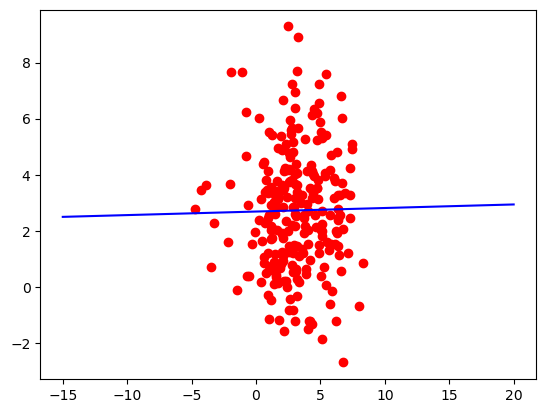

In [41]:
rho = calculate_correlation(x, y)
print(f'Коэффициент корреляции: {rho}')
print('-'*50)

f_rho = calculate_fisher(rho)
print(f'После преобразования Фишера: {f_rho}')
print('-'*50)

z_rho = calculate_zhuk(rho,n)
print(f'После преобразования Жуковского: {z_rho}')
print('-'*50)

X = np.linspace(-15, 20, 100)
S_x = x.var()
S_y = y.var()
Y = rho * (X - av_x) / math.sqrt(S_x) * math.sqrt(S_y) + av_y

plt.scatter(x, y, c="red")
plt.plot(X, Y, c="blue")
plt.show()

## Вычисление коэффициента корреляции для линейного зависимости + шум

Коэффициент корреляции: 0.9996572217967395
--------------------------------------------------
После преобразования Фишера: 4.335701367226417
--------------------------------------------------
После преобразования Жуковского: 852.0820218767785
--------------------------------------------------


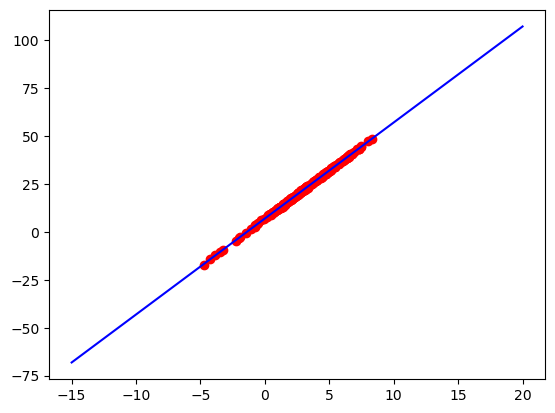

In [42]:
y = np.array([5 * _x + 7 + 0.3 * np.random.normal(0, 1) for _x in x])
av_x, av_y = np.average(x), np.average(y)

rho = calculate_correlation(x, y)
print(f'Коэффициент корреляции: {rho}')
print('-'*50)

f_rho = calculate_fisher(rho)
print(f'После преобразования Фишера: {f_rho}')
print('-'*50)

z_rho = calculate_zhuk(rho, n)
print(f'После преобразования Жуковского: {z_rho}')
print('-'*50)

X = np.linspace(-15, 20, 100)
S_x = x.var()
S_y = y.var()
Y = rho * (X - av_x) / math.sqrt(S_x) * math.sqrt(S_y) + av_y

plt.scatter(x, y, c="red")
plt.plot(X, Y, c="blue")
plt.show()

## Построение многочленной регрессии

In [33]:
p = 4
y = np.array([4 * math.sin(_x) + 0.3 * np.random.normal(0, 1) for _x in x])

arr = []
for i in range(p + 1):
    arr.append([])
    for j in range(p + 1):
        arr[i].append(sum( (_x**i * _x**j) for _x in x))
A = np.matrix(arr)

b = []
for i in range(p + 1):
    b.append(sum([y[j] * x[j]**i for j in range(n//2)]))
b = np.array(b)

beta = np.linalg.solve(A, b)

## Построение графика

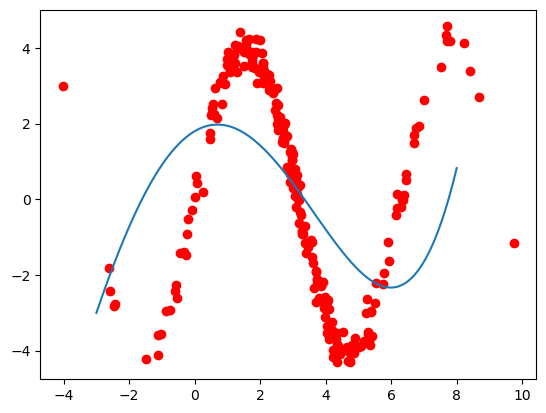

In [34]:
plt.scatter(x, y, c='red')
Y = []
X = np.linspace(-3, 8, 1000)
for _x in X:
    Y.append(sum([beta[i] * _x**i for i in range(p + 1)]))
Y = np.array(Y)
plt.plot(X, Y)
plt.show()

## Увеличим количество степеней

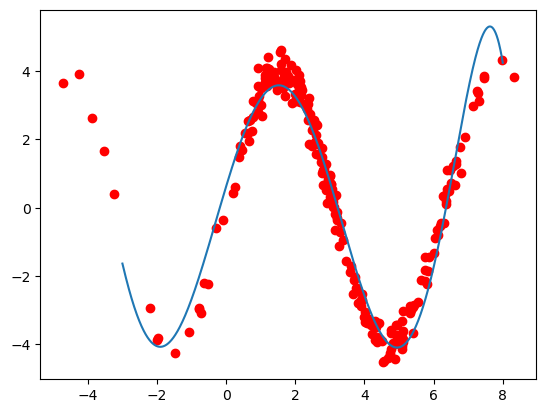

In [45]:
p = 6
y = np.array([4 * math.sin(_x) + 0.3 * np.random.normal(0, 1) for _x in x])

arr = []
for i in range(p + 1):
    arr.append([])
    for j in range(p + 1):
        arr[i].append(sum( (_x**i * _x**j) for _x in x))
A = np.matrix(arr)

b = []
for i in range(p + 1):
    b.append(sum([y[j] * x[j]**i for j in range(n//2)]))
b = np.array(b)

beta = np.linalg.solve(A, b)

# построение графика
plt.scatter(x, y, c='red')
Y = []
X = np.linspace(-3, 8, 1000)
for _x in X:
    Y.append(sum([beta[i] * _x**i for i in range(p + 1)]))
Y = np.array(Y)
plt.plot(X, Y)
plt.show()